In [9]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from matplotlib.markers import MarkerStyle
from matplotlib.colors import Normalize

In [10]:
df_comb = pd.read_csv("../logs/query5/window16/combined.csv")
df_comb["SourcenumRecordsOutPerSecond_percent"] = 1.0-(df_comb['SourcenumRecordsOutPerSecond_avg']/df_comb['rate'])
df_comb["SourcenumRecordsOutPerSecond_percent"] = df_comb["SourcenumRecordsOutPerSecond_percent"].apply(lambda x: 0.0 if x <= 0.0 else x)

In [11]:
df_comb

,Unnamed: 0,i,itr,dvfs,rate,policy,nwindows,pkg_watts_avg,pkg_watts_std,ram_watts_avg,...,WindownumRecordsOutPerSecond_avg,WindownumRecordsOutPerSecond_std,WindowbusyTimeMsPerSecond_avg,WindowbusyTimeMsPerSecond_std,WindowbackPressuredTimeMsPerSecond_avg,WindowbackPressuredTimeMsPerSecond_std,WindowbusyTime_%,WindowbackPressuredTime_%,Windowlength,SourcenumRecordsOutPerSecond_percent
0,0,0,1,1.0,100000,ondemand,16,41.13,2.63,-535.10,...,18187.768692,95.313123,151.585989,16.542379,0.000000,0.000000,15.158599,0.000000,60,0.000000
1,1,0,1,1.0,200000,ondemand,16,66.79,5.87,14.66,...,36381.801562,153.663934,334.611111,28.627113,0.000000,0.000000,33.461111,0.000000,60,0.000000
2,2,0,1,1.0,300000,ondemand,16,93.27,5.13,18.33,...,54361.461979,182.519348,530.498570,41.054344,0.000000,0.000000,53.049857,0.000000,60,0.001062
3,3,0,1,1.0,100000,conservative,16,39.05,2.11,11.20,...,18060.163947,151.775830,170.604984,18.576476,0.000000,0.000000,17.060498,0.000000,60,0.000285
4,4,0,1,1.0,200000,conservative,16,63.62,5.67,14.72,...,36327.017657,145.589294,348.493464,27.440525,0.006944,0.028633,34.849346,0.000694,60,0.000143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,955,0,1000,2.2,300000,userspace,16,85.68,3.28,17.98,...,53644.880389,362.688499,591.182394,46.088246,0.048815,0.182837,59.118239,0.004882,60,0.014717
956,956,0,1000,2.3,300000,userspace,16,89.35,4.18,18.05,...,53724.674884,233.610515,601.311479,53.187298,0.006944,0.028633,60.131148,0.000694,60,0.014802
957,957,0,1000,2.4,300000,userspace,16,90.55,4.03,18.02,...,53121.683681,417.848748,561.271446,41.075708,0.000000,0.000000,56.127145,0.000000,60,0.021996
958,958,0,1000,2.5,300000,userspace,16,93.02,4.66,18.14,...,53818.144560,440.788269,562.743668,45.271275,0.149510,0.615992,56.274367,0.014951,60,0.007752


In [12]:
print(df_comb.columns)

Index(['Unnamed: 0', 'i', 'itr', 'dvfs', 'rate', 'policy', 'nwindows',
       'pkg_watts_avg', 'pkg_watts_std', 'ram_watts_avg', 'ram_watts_std',
       'SinknumRecordsInPerSecond_avg', 'SinknumRecordsInPerSecond_std',
       'SinknumRecordsOutPerSecond_avg', 'SinknumRecordsOutPerSecond_std',
       'SinkbusyTimeMsPerSecond_avg', 'SinkbusyTimeMsPerSecond_std',
       'SinkbackPressuredTimeMsPerSecond_avg',
       'SinkbackPressuredTimeMsPerSecond_std', 'SinkbusyTime_%',
       'SinkbackPressuredTime_%', 'SourcenumRecordsInPerSecond_avg',
       'SourcenumRecordsInPerSecond_std', 'SourcenumRecordsOutPerSecond_avg',
       'SourcenumRecordsOutPerSecond_std', 'SourcebusyTimeMsPerSecond_avg',
       'SourcebusyTimeMsPerSecond_std',
       'SourcebackPressuredTimeMsPerSecond_avg',
       'SourcebackPressuredTimeMsPerSecond_std', 'SourcebusyTime_%',
       'SourcebackPressuredTime_%', 'WindownumRecordsInPerSecond_avg',
       'WindownumRecordsInPerSecond_std', 'WindownumRecordsOutPerSecond_a

In [16]:
def graph(rate, dfo, dfu, left=-0.1, right=1.1, metric='SourcenumRecordsOutPerSecond_percent'):
    plt.rcParams['figure.figsize'] = 25, 10
    plt.rc('axes', labelsize=30)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=30)    # fontsize of the tick labels

    fig, ax = plt.subplots()

    scatter_c1 = ax.scatter(dfu[metric].tolist(),
                            dfu['pkg_watts_avg'].tolist(), s=500, c=dfu.itr, edgecolor="black", 
                            cmap='Blues', marker=MarkerStyle("o", fillstyle="right"), label="userspace")

    scatter_c2 = ax.scatter(dfu[metric].tolist(),
                            dfu['pkg_watts_avg'].tolist(), s=500, c=dfu.dvfs, edgecolor="black", 
                            cmap='Reds', marker=MarkerStyle("o", fillstyle="left"))

    ax.scatter(dfo[metric].tolist(),
                            dfo['pkg_watts_avg'].tolist(), s=500,edgecolor="black", c='lime',
                           marker=MarkerStyle("o"), label="ondemand")

    # Add colorbars
    cbar_c1 = plt.colorbar(scatter_c1, ax=ax, orientation='vertical', label="ITR-delay (us)")
    cbar_c2 = plt.colorbar(scatter_c2, ax=ax, orientation='vertical', label="DVFS (Ghz)")

    ax.set_xlabel(metric)
    ax.set_ylabel('Power')
    ax.set_xlim(left=left, right=right)
    #ax.set_ylim(bottom=35, top=110.0)

    ax.set_title(f"Query1 @ {rate}K RPS", size=22)
    plt.legend(fontsize=22)

    plt.tight_layout()


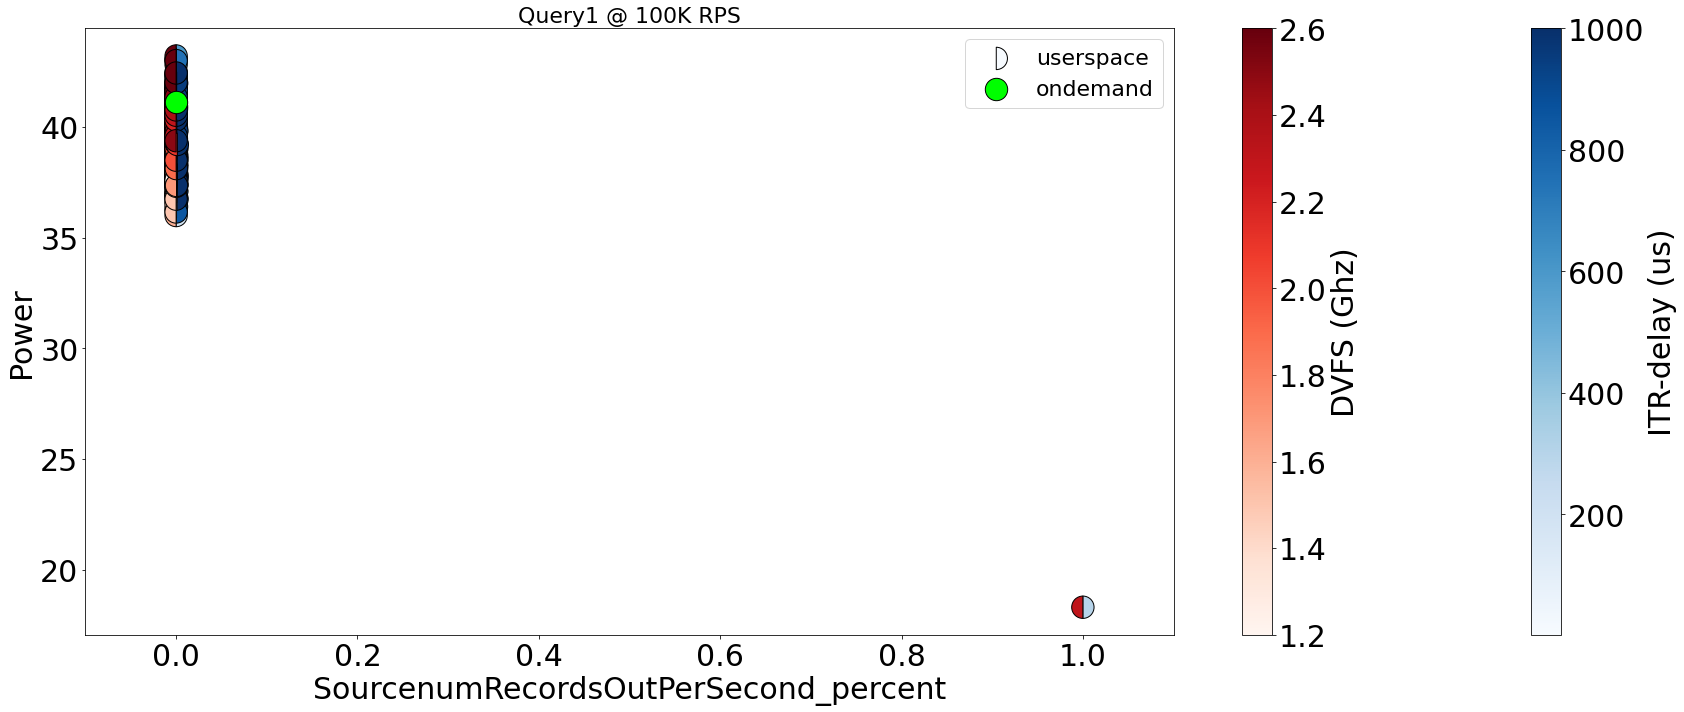

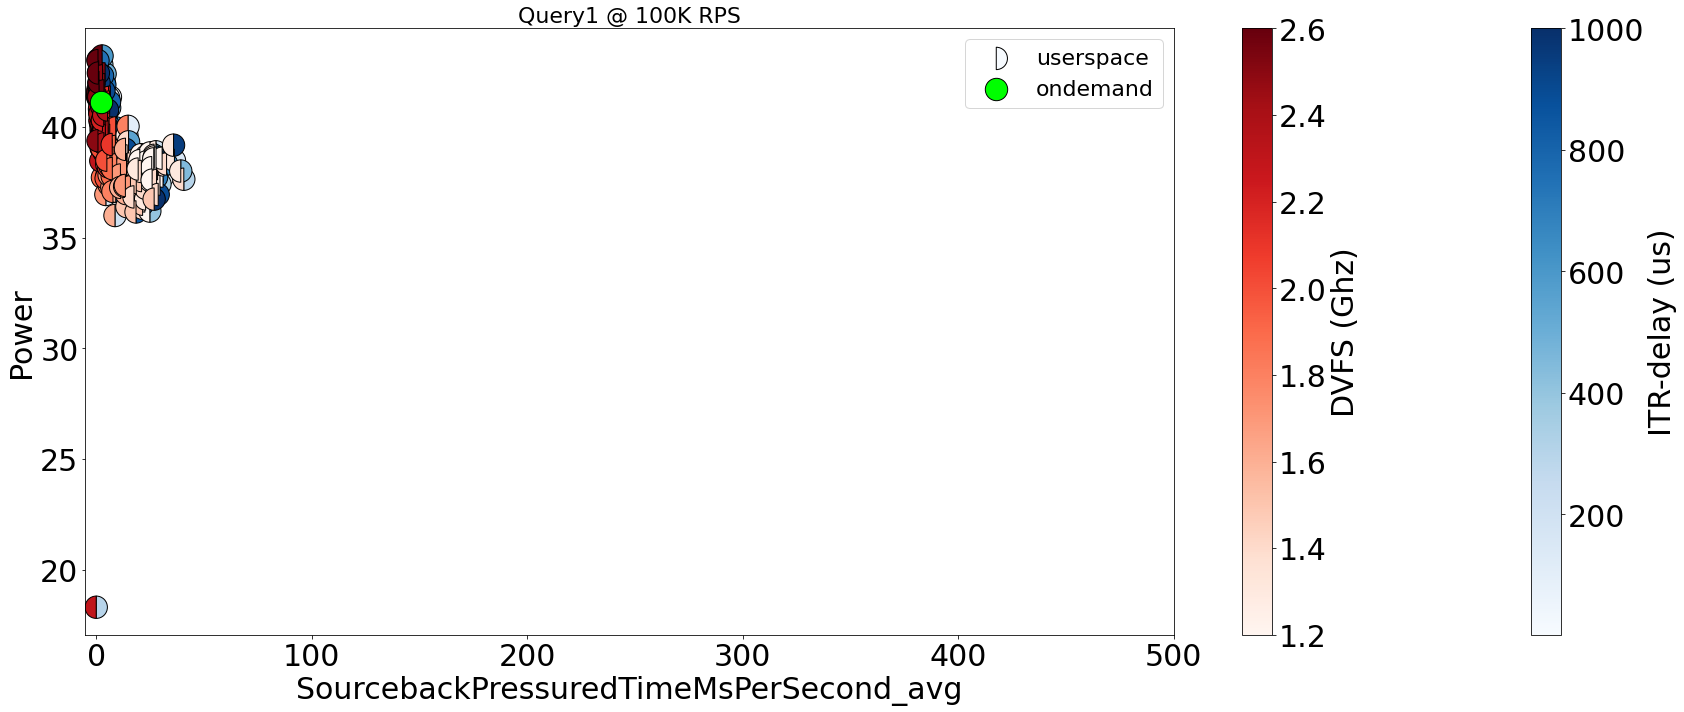

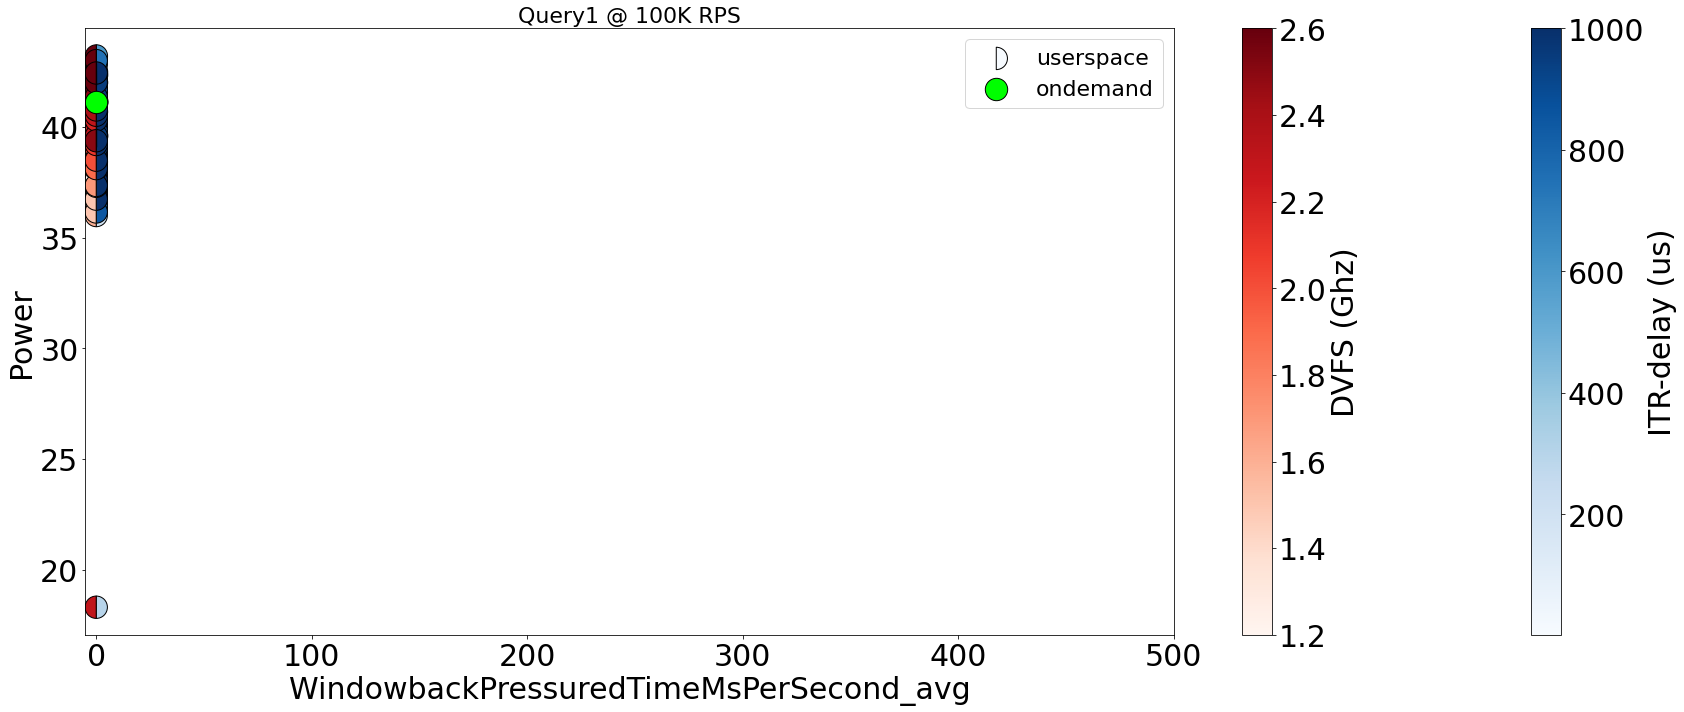

In [21]:
df100o = df_comb[(df_comb.rate == 100000) & (df_comb.policy == 'ondemand')]
df100u = df_comb[(df_comb.rate == 100000) & (df_comb.policy == 'userspace')]
graph(100, df100o, df100u)
graph(100, df100o, df100u, -5, 500, 'SourcebackPressuredTimeMsPerSecond_avg')
graph(100, df100o, df100u, -5, 500, 'WindowbackPressuredTimeMsPerSecond_avg')



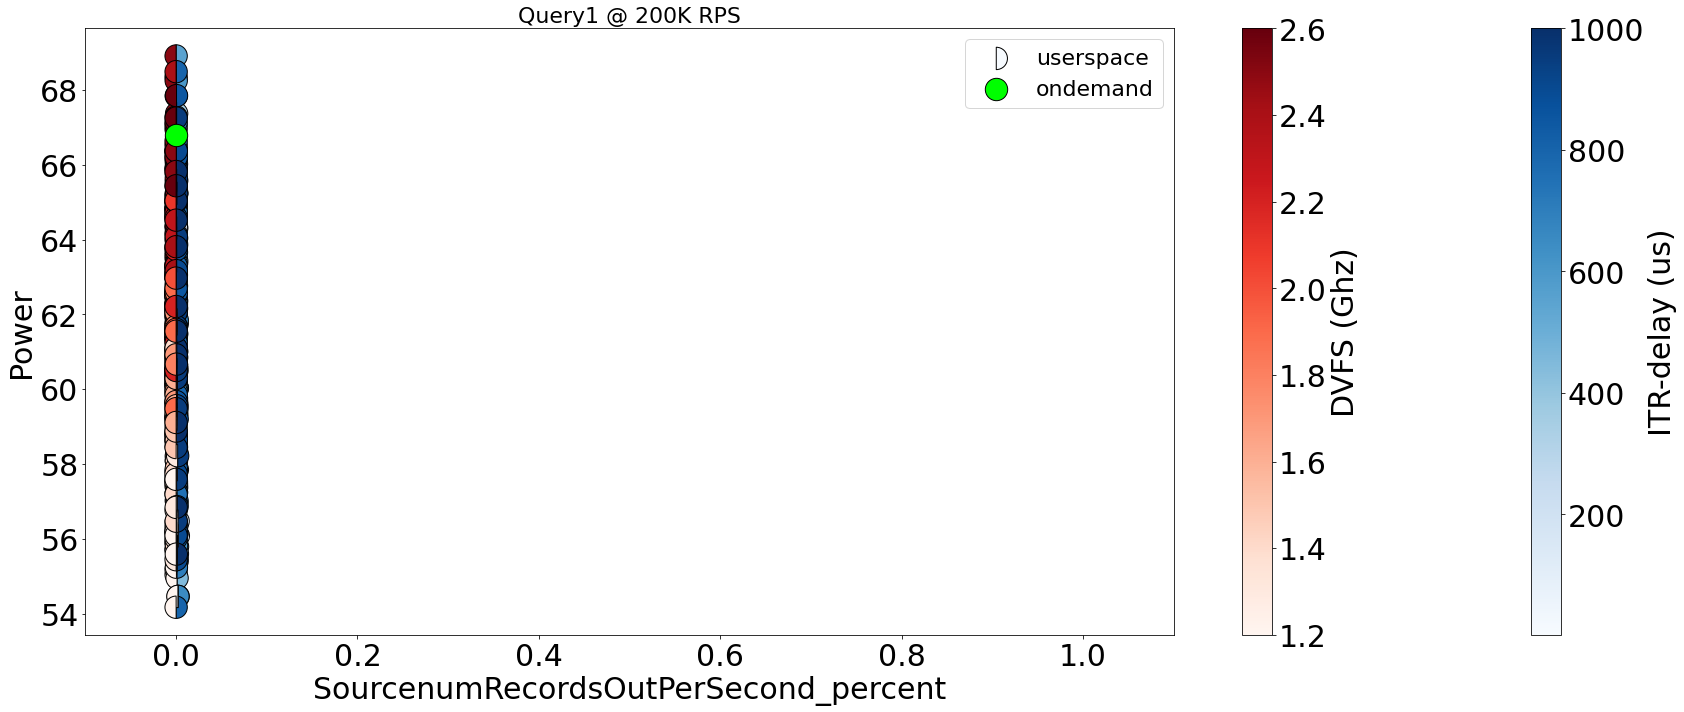

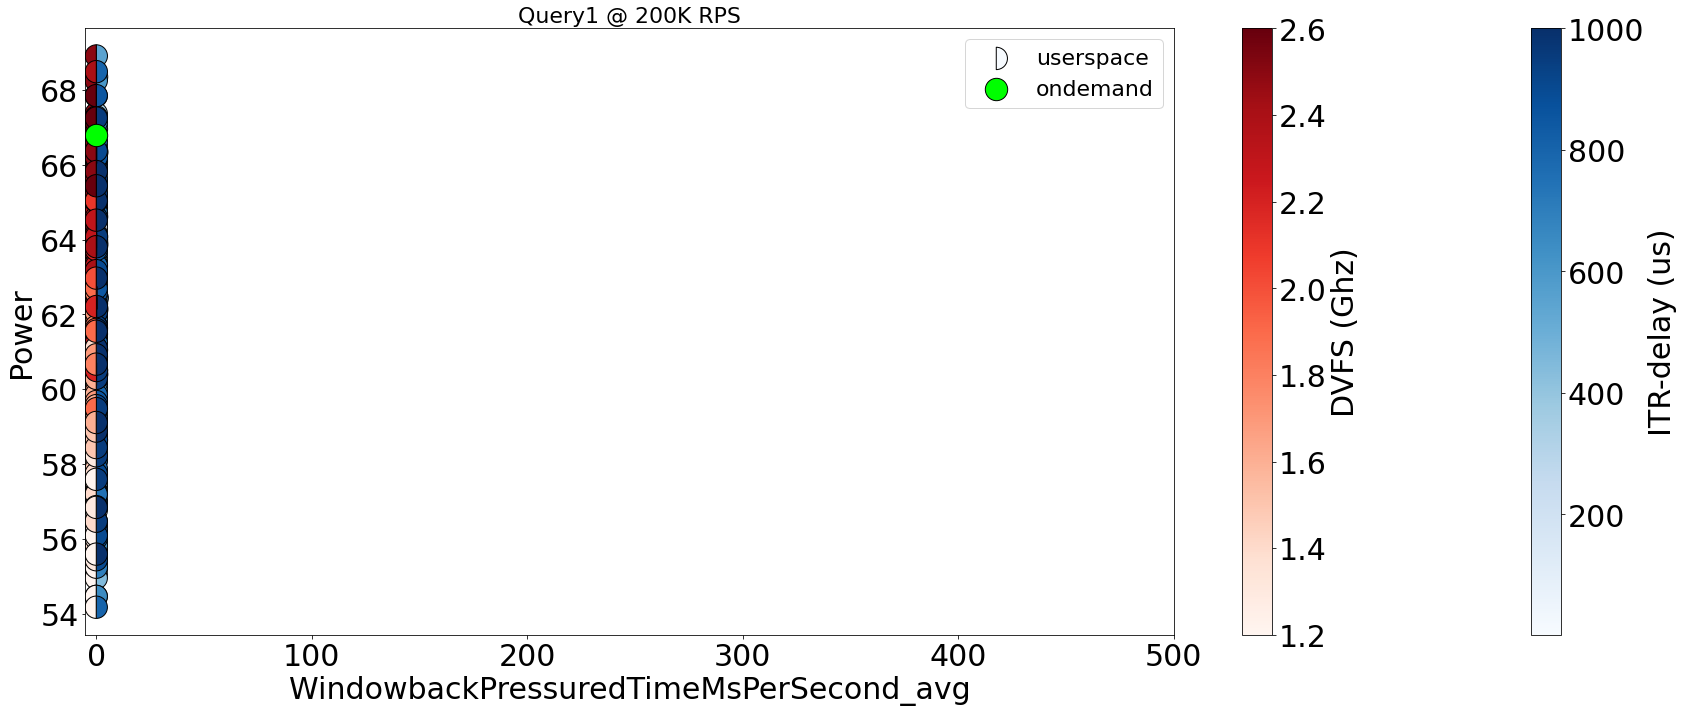

In [22]:
df200o = df_comb[(df_comb.rate == 200000) & (df_comb.policy == 'ondemand')]
df200u = df_comb[(df_comb.rate == 200000) & (df_comb.policy == 'userspace')]
graph(200, df200o, df200u)  
graph(200, df200o, df200u, -5, 500, 'WindowbackPressuredTimeMsPerSecond_avg')

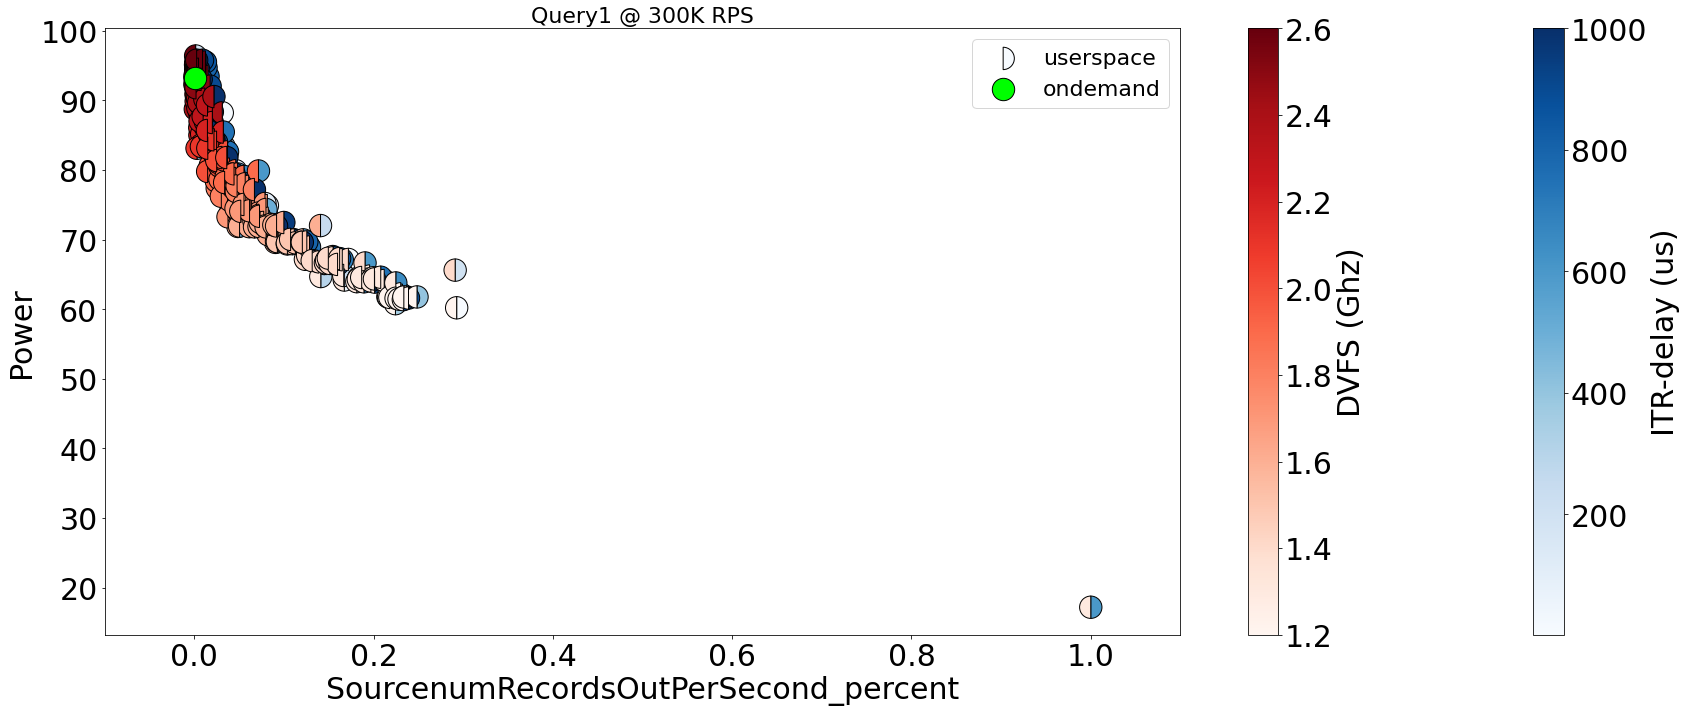

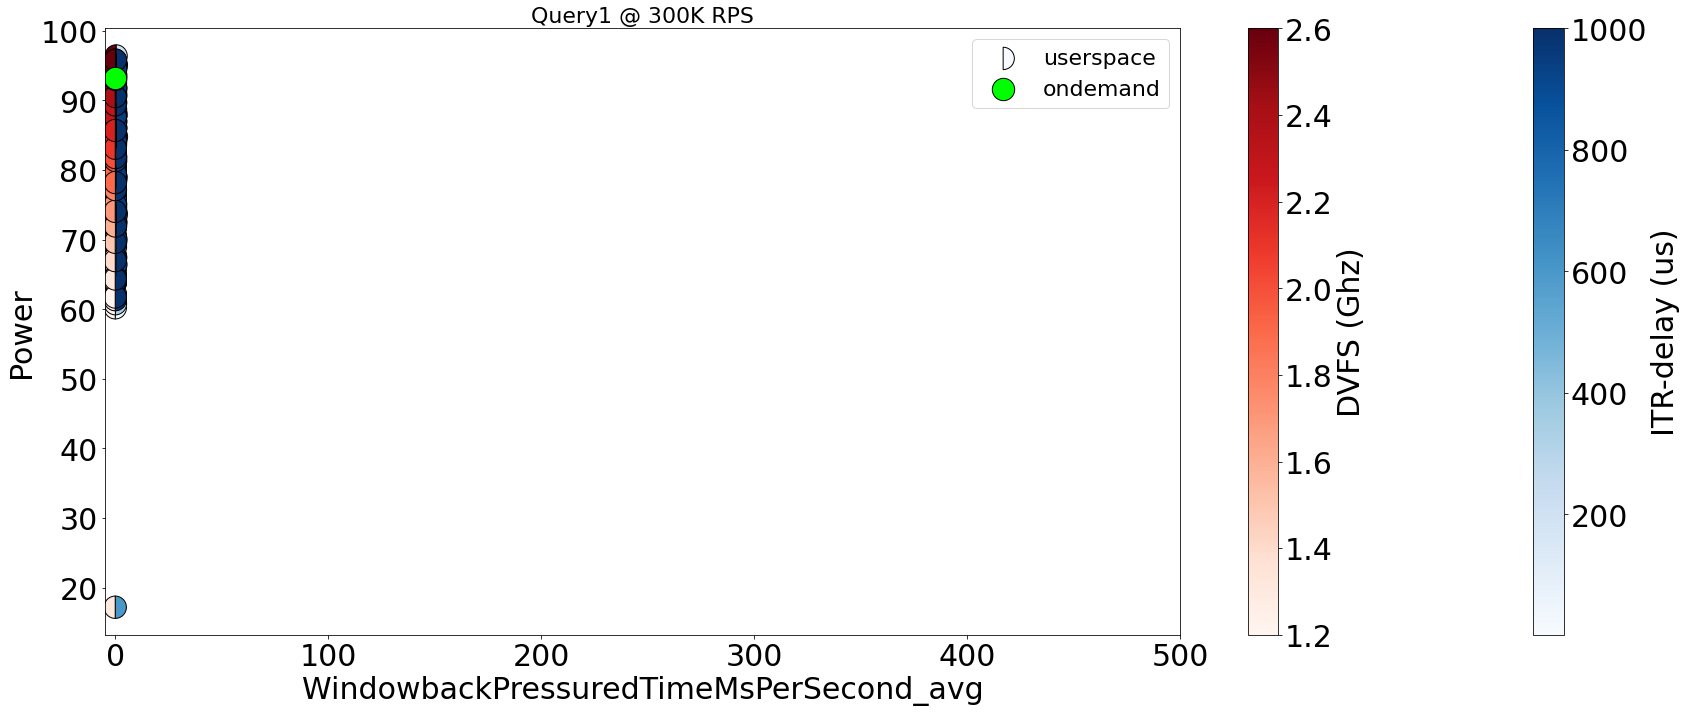

In [23]:
df300o = df_comb[(df_comb.rate == 300000) & (df_comb.policy == 'ondemand')]
df300u = df_comb[(df_comb.rate == 300000) & (df_comb.policy == 'userspace')]
graph(300, df300o, df300u) 
graph(300, df300o, df300u, -5, 500, 'WindowbackPressuredTimeMsPerSecond_avg')